## Введение в анализ данных с pandas
https://habr.com/post/196980

In [1]:
import numpy as np
import pandas as pd

Для пример загрузим 2 текстовых файла. Это можно сделать функцией read_csv():

In [2]:
df1 = pd.read_csv('df1.txt')
df2 = pd.read_csv('df2.txt', ';')
df1

,shop,qty
0,427,3
1,707,4
2,957,2
3,437,1


In [3]:
df2

,shop,name
0,347,Киев
1,427,Самара
2,707,Минск
3,957,Иркутск
4,437,Москва


Над наборами данных можно выполнять различные действия, например объединение, добавление столбцов, добавление записей, фильтрация, построение сводных и другие. Давайте теперь, чтобы продемонстрировать все описанные выше возможности, следующие задачи:

1. в набор с городами магазинов добавим поле `country` и заполним соответствующими странами
2. выберем украинский магазин и поменяем его номер
3. добавим магазин, полученный на предыдущем шаге, к общему списку
4. добавим количество из `df1` к набору `df2`
5. построим сводную таблицу по странам и количеству отгрузок

Итак, для добавления нового столбца в набор данных существует команда [insert()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.insert.html?highlight=insert#pandas.DataFrame.insert): 

In [4]:
country = ['Украина', 'РФ', 'Беларусь', 'РФ', 'РФ']
df2.insert(1, 'country', country)
df2

,shop,country,name
0,347,Украина,Киев
1,427,РФ,Самара
2,707,Беларусь,Минск
3,957,РФ,Иркутск
4,437,РФ,Москва


Теперь на надо выбрать магазин, у которого страна будет равна `Украина`. Для обращения к столбцам в DataFrame существует 2 способа:

- через точку — `НаборДанных.ИмяПоля`
- в квадратных скобках – `НаборДанных[‘ИмяПоля’]`

Для того, чтобы отфильтровать набор данных можно использовать квадратные скобки внутри которых будет условие `НаборДанных[условие]`. Условие должно содержать имена полей, в формате описанном выше, и условие, налагаемое на них. Таким образом выбрать брать интересующий магазин и заменить его номер можно так:

In [5]:
df2[df2.country == 'Украина']

,shop,country,name
0,347,Украина,Киев


Результатом выполнения данного кода, будет новый промежуточный набор данных `t`, содержащий одну запись:

In [6]:
t = df2[df2.country == 'Украина']
t.shop = 345
t

/home/vanko/.jupyter/lib/python3.5/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,shop,country,name
0,345,Украина,Киев


Для того чтобы добавить полученную на предыдущем шаге запись, нужно выполнить функцию `append()`, в качестве аргумента которой передается набор данных, который нужно добавить к исходному:

In [7]:
df2 = df2.append(t)
df2

,shop,country,name
0,347,Украина,Киев
1,427,РФ,Самара
2,707,Беларусь,Минск
3,957,РФ,Иркутск
4,437,РФ,Москва
0,345,Украина,Киев


In [8]:
df1

,shop,qty
0,427,3
1,707,4
2,957,2
3,437,1


Теперь к нашему основному списку магазинов `df2`, можно подтянуть количество из набора данных `df1`. Сделать это можно с помощью функции [merge()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge), которая соединяет два набора данных (аналог `join` в SQL).

В качестве параметров функция принимает:

- набор данных (который будет присоединен к исходному)
- тип соединения
- поле, по которому происходит соединение

Набор данных перед финальной операцией выглядит так:

In [9]:
res = df2.merge(df1, 'left', on='shop')
res

,shop,country,name,qty
0,347,Украина,Киев,NaN
1,427,РФ,Самара,3.0
2,707,Беларусь,Минск,4.0
3,957,РФ,Иркутск,2.0
4,437,РФ,Москва,1.0
5,345,Украина,Киев,NaN


Осталось построить сводную таблицу, чтобы понять,
какое количество по каждой стране отгружено.
Для этого существует функция [pivot_table()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.tools.pivot.pivot_table.html#pandas.tools.pivot.pivot_table).
В нашем примере функция в качестве параметров принимает:

- список столбцов, по которым будет считаться агрегированные значение
- список столбцов, которые будут строками итоговой таблицы
- функция, которая используется для агрегации
- параметр для замены пустых значений на 0

In [10]:
res.pivot_table(['qty'],['country'], aggfunc='sum', fill_value = 0)

,qty
country,
Беларусь,4
РФ,6
Украина,0


## Введение в визуализацию данных при анализе с помощью Pandas
https://habr.com/post/197212/

In [11]:
!pip install -q xlrd

In [12]:
import pandas as pd

In [13]:
data = pd.read_excel('demo11.xls', 'Лист1',
                     header=4, usecols="A:B",
                     skipfooter=2, index_col=0)

В нашем случае функция имеет 6 параметров:
1. Имя открываемого файла
2. Имя листа, на котором содержатся данные
3. Номер строки содержащей названия полей (в нашем случае это строка 4,
   т.к. первые 3 строки содержат справочную информацию)
4. Список столбцов, которые попадут в набор данных
   (в нашем случае из всей таблицы нам нужны только 2 столбца:
   год и количество населения, соответствующее ему)
5. Следующий параметр означает, что мы не будет учитывать 2 последние строки
   (в них содержатся комментарии)
6. Последний параметр указывает, что первый из полученных столбцов
   мы будем использовать в качестве индекса

Функция `rename()` используется для переименования заголовков набора данных на в параметре ей передается словарь типа `{'Старое имя поля':'Новое имя поля'}`

In [14]:
c = data.rename(columns={'население,': 'PeopleQty'})
c.head(15)

,PeopleQty
NaN,млн.человек
1897,NaN
в границах Российской империи,128.2
в современных границах,67.5
1914,NaN
в границах Российской империи,165.7
в современных границах,89.9
1917,91
1926,92.7
1939,108.4


Данные в столбце индекса не совсем корректные. Например, там содержатся не только номера годов, но и текстовые пояснения, а еще он содержит пустые значения. Кроме того, можно увидеть, что до 1970 года, данные заполнены не очень хорошо, из-за больших временных промежутков между соседними значениями.

Используем дополнительный DataFrame, т. к. в процессе его формирования будет показано, как можно средствами pandas создать временную последовательность.
Для формирования временной шкалы можно использовать функцию date_range(). В параметрах ей передается 3 параметра: начальное значение, количество периодов, размер периода (День, месяц, год и т.д.). В нашем случае давайте сформируем последовательность, начиная с 1970 по настоящий момент, т.к. с этого момента данные в нашей таблице заполнены практически за каждый год:

In [15]:
a = pd.date_range('1970-1-1', periods=46, freq='AS')
a

DatetimeIndex(['1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

На выходе у нас сформировалась последовательность с 1970 по 2015 год.

Теперь нам необходимо добавить эту последовательность в DataFrame, кроме того, чтобы соединиться с исходным набором данных, нам нужен непосредственно номер года, а не дата его начала, как в последовательности. Для этого у нашей временной последовательности есть свойство year, которое как раз и возвращает номер года каждой записи.

In [16]:
b = pd.DataFrame(a, index=a.year, columns=['year'])
b.head(10)

,year
1970,1970-01-01
1971,1971-01-01
1972,1972-01-01
1973,1973-01-01
1974,1974-01-01
1975,1975-01-01
1976,1976-01-01
1977,1977-01-01
1978,1978-01-01
1979,1979-01-01


Теперь у нас есть 2 набора данных, осталось их соединить. В прошлой статье было показано, как это сделать [merge()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge). В этот же раз мы будем использовать другую функцию [join()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join). Эту функцию можно применять, когда у ваших наборов данных одинаковые индексы (кстати, именно для того, чтобы продемонстрировать эту функцию мы их и добавляли).
Стоит сразу отметить разницу между функциями `merge()` и `join()`. `Merge()` может производить соединение по разным столбцам, `join()` же, в свою очередь, работает только с индексами.

In [17]:
i = b.join(c, how='inner')
i.head(10)

,year,PeopleQty
1970,1970-01-01,129.9
1971,1971-01-01,130.6
1972,1972-01-01,131.3
1973,1973-01-01,132.1
1974,1974-01-01,132.8
1975,1975-01-01,133.6
1976,1976-01-01,134.5
1977,1977-01-01,135.5
1978,1978-01-01,136.5
1979,1979-01-01,137.4


Нарисуем самый простой график, отображающий динамику роста населения. Сделать это можно функцией `plot()`. У этой функции много параметров, но для простого примера нам хватит задать значение осей `x` и `y` и параметра `style`, который отвечает за стиль. Выглядеть это будет так:

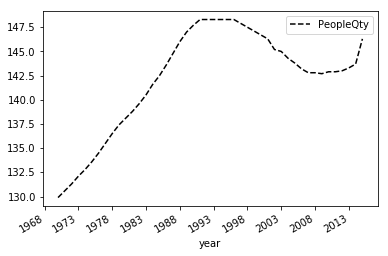

In [18]:
%matplotlib inline
i.plot(x='year',y='PeopleQty',style='k--')

Теперь давайте отобразим динамику в виде столбчатой диаграммы. Сделать это можно при помощи параметра `kind`. По умолчанию параметр равен ``line``. Чтобы сделать диаграмму с вертикальными столбцами нужно поменять значение этого параметра на ``bar``, для горизонтальных столбцов существует значение ``barh``. Итак для горизонтальных столбцов, код будет выглядеть так:

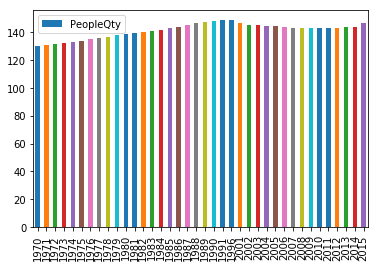

In [19]:
i.plot(y='PeopleQty', kind='bar')

Как видно из кода, тут мы не задаем значение х в отличие от предыдущих примеров, в качестве х используется индекс. Для полноценной работы с графикой и наведения красоты необходимо использовать возможности `matplotlib`, про нее уже есть много статей. Это связано с тем, что функция рисования в pandas является всего лишь надстройкой, для быстрого вызова основных функций рисования из вышеуказанной библиотеки, таких как `matplotlib.pyplot.bar()`. Соответственно все параметры используемые в при вызове функций из matplotlib, могут быть заданы через функцию `plot()` пакета pandas.
